In [1]:
#imoport some packages to use 
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

#To see our directory 
import os 
import random 
import gc #Gabage collector for cleanning data from memory 
from skimage import io, data_dir

In [2]:
new_path_str = 'bathroom/new'
old_path_str = 'bathroom/old'

#rename the images in the new folder
i=0
for item in os.listdir(new_path_str):
    os.rename(os.path.join(new_path_str,item),os.path.join(new_path_str,('new.'+str(i)+'.jpg')))
    i +=1



    



In [3]:
i=0
for item in os.listdir(old_path_str):
    os.rename(os.path.join(old_path_str,item),os.path.join(old_path_str,('old.'+str(i)+'.jpg')))
    i +=1

In [40]:
new_path_str = 'google_type_condition/bathroom/testnew'
old_path_str = 'google_type_condition/bathroom/testold'
i=0
for item in os.listdir(new_path_str):
    os.rename(os.path.join(new_path_str,item),os.path.join(new_path_str,('new.'+str(i)+'.jpg')))
    i +=1
i=0
for item in os.listdir(old_path_str):
    os.rename(os.path.join(old_path_str,item),os.path.join(old_path_str,('old.'+str(i)+'.jpg')))
    i +=1



In [4]:
train_dir = 'bathroom/train'


In [5]:
train_imgs = ['bathroom/train/{}'.format(i) for i in os.listdir(train_dir)]


In [6]:
print(len(train_imgs))

936


In [30]:
test_dir = 'bathroom/test'
test_imgs = ['bathroom/test/{}'.format(i) for i in os.listdir(test_dir)]

In [31]:
print(len(test_imgs))

125


In [32]:
random.shuffle(test_imgs)

In [7]:
random.shuffle(train_imgs)

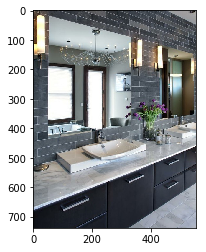

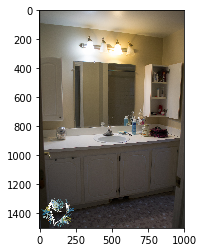

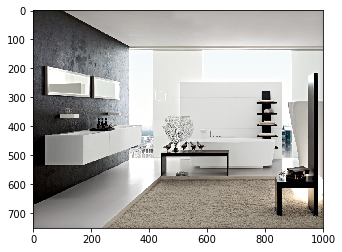

In [8]:
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [9]:
nrows  = 150
ncolumns =150
channels =3

In [10]:
# A function to read and process the images to an acceptable format for our model 
def read_and_process_images(list_of_images):
    #Returns two arrays 
    #X is an array of resized images 
    #y is an array of labels
    X = [] #images 
    y = [] # labels
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image,cv2.IMREAD_COLOR),(nrows,ncolumns), interpolation=cv2.INTER_CUBIC))
        if 'new' in image:
            y.append(1)
        elif 'old' in image:
            y.append(0)
    return X,y

In [11]:
X,y = read_and_process_images(train_imgs)

In [12]:
X[0]

array([[[ 87,  96, 110],
        [ 83,  92, 112],
        [ 61,  70,  84],
        ...,
        [  7,   8,   4],
        [ 16,  17,   8],
        [151, 147, 142]],

       [[ 65,  75,  83],
        [ 60,  70,  87],
        [ 92, 106, 116],
        ...,
        [  0,   0,   4],
        [ 82,  88,  91],
        [147, 150, 154]],

       [[ 57,  66,  71],
        [ 57,  69,  87],
        [ 63,  79,  95],
        ...,
        [162, 166, 167],
        [153, 158, 157],
        [166, 167, 167]],

       ...,

       [[ 16,  13,   9],
        [ 22,  17,  14],
        [ 24,  19,  16],
        ...,
        [197, 180, 172],
        [194, 178, 171],
        [198, 182, 175]],

       [[ 16,  13,   9],
        [ 22,  17,  14],
        [ 24,  19,  16],
        ...,
        [193, 180, 172],
        [194, 182, 176],
        [193, 181, 175]],

       [[ 16,  13,   9],
        [ 22,  17,  14],
        [ 23,  18,  15],
        ...,
        [191, 180, 173],
        [193, 181, 177],
        [190, 178, 174]]

In [13]:
y

[1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,


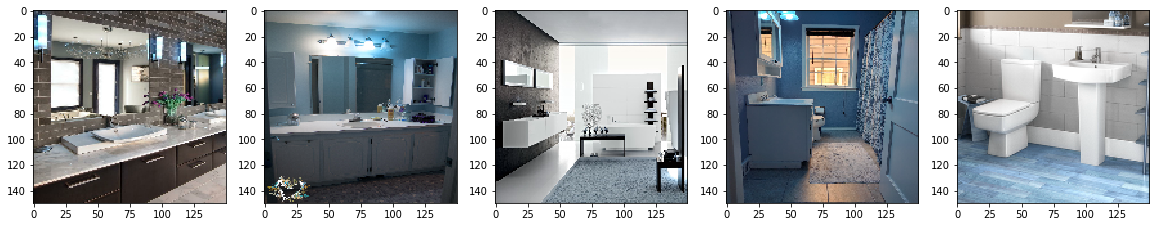

In [14]:
plt.figure(figsize=(20,10))
columns =  5
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i+1)
    plt.imshow(X[i])

Text(0.5, 1.0, 'Labels for new and old')

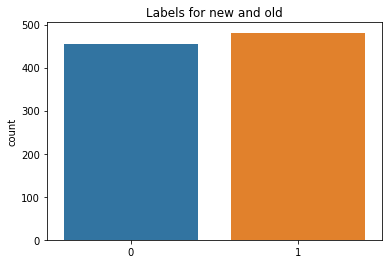

In [15]:
import seaborn as sns
del train_imgs 
gc.collect()

#Convert list to numpy array
X = np.array(X)
y = np.array(y)

#Lets plot the label to be sure we just have two class
sns.countplot(y)
plt.title('Labels for new and old')


In [16]:
print("Shape of train images is:", X.shape)
print("Shape of labels is:",y.shape)

Shape of train images is: (936, 150, 150, 3)
Shape of labels is: (936,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.20, random_state=2)
print("Shape of train images is:", X_train.shape)
print("Shape of validation images is:", X_train.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_val.shape)

Shape of train images is: (748, 150, 150, 3)
Shape of validation images is: (748, 150, 150, 3)
Shape of labels is: (748,)
Shape of labels is: (188,)


In [18]:
#clear memory
#del X
del y
gc.collect()
# get the length of the train and validation data
ntrain = len(X_train)
nval = len(X_val)

#We will use a batch size of 32. Note: batch size should be a factor of 2. 
batch_size =32



In [19]:
from keras import layers
from keras import models 
from keras import optimizers 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.


In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation= 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
#Lets see our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 147968)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 147968)            0         
__________

In [22]:
model.compile(loss='binary_crossentropy', optimizer = optimizers.RMSprop(lr = 1e-4), metrics = ['acc'])

In [23]:
# Lets create the augmentation configuration 
#This helps prevent overfitting, since we are using a small dataset
train_datagen = ImageDataGenerator (rescale = 1./255, 
                                    rotation_range = 40, 
                                    width_shift_range = 0.2, 
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

In [24]:
val_datagen = ImageDataGenerator(rescale =1./255)

In [25]:
train_generator = train_datagen.flow(X_train,y_train, batch_size= batch_size)
val_generator = val_datagen.flow(X_val,y_val,batch_size = batch_size)

In [26]:
#The training part 
# We train for 64 epochs whith about 100 steps per epoch 
history = model.fit_generator(train_generator,
                              steps_per_epoch = ntrain // batch_size,
                              epochs =64, 
                              validation_data = val_generator,
                              validation_steps = nval // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/64
23/23 [==============================] - 25s 1s/step - loss: 0.9736 - acc: 0.4851 - val_loss: 0.6737 - val_acc: 0.5875
Epoch 2/64
23/23 [==============================] - 21s 919ms/step - loss: 0.6885 - acc: 0.5558 - val_loss: 0.6589 - val_acc: 0.5962
Epoch 3/64
23/23 [==============================] - 21s 934ms/step - loss: 0.6879 - acc: 0.5612 - val_loss: 0.6548 - val_acc: 0.6474
Epoch 4/64
23/23 [==============================] - 22s 955ms/step - loss: 0.6554 - acc: 0.6151 - val_loss: 0.6170 - val_acc: 0.6026
Epoch 5/64
23/23 [==============================] - 23s 985ms/step - loss: 0.6200 - acc: 0.6501 - val_loss: 0.7611 - val_acc: 0.4551
Epoch 6/64
23/23 [==============================] - 22s 977ms/step - loss: 0.6443 - acc: 0.6306 - val_loss: 0.5782 - val_acc: 0.6667
Epoch 7/64
23/23 [==============================] - 23s 982ms/step - loss: 0.6127 - acc: 0.6689 - val_loss: 0.5823 - val_acc: 0.6750
Epoch 8/64
23/23 [======

23/23 [==============================] - 22s 977ms/step - loss: 0.4453 - acc: 0.7875 - val_loss: 0.5283 - val_acc: 0.7372
Epoch 61/64
23/23 [==============================] - 23s 1s/step - loss: 0.4204 - acc: 0.8118 - val_loss: 0.6205 - val_acc: 0.7125
Epoch 62/64
23/23 [==============================] - 23s 1s/step - loss: 0.4714 - acc: 0.7710 - val_loss: 0.5545 - val_acc: 0.7436
Epoch 63/64
23/23 [==============================] - 23s 982ms/step - loss: 0.4576 - acc: 0.7653 - val_loss: 0.4973 - val_acc: 0.7949
Epoch 64/64
23/23 [==============================] - 22s 939ms/step - loss: 0.4420 - acc: 0.7824 - val_loss: 0.5663 - val_acc: 0.7372


In [27]:
#save the model 
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')

<Figure size 432x288 with 0 Axes>

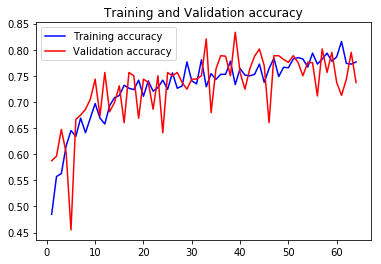

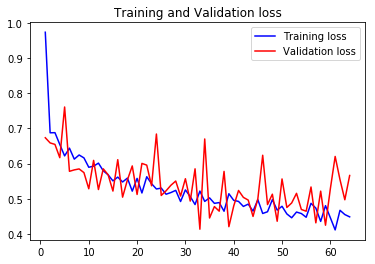

<Figure size 432x288 with 0 Axes>

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)

#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()


In [46]:
#Now lets predict on the first 10 Images of the test set 
X_test, y_test = read_and_process_images(test_imgs[50:60])
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale = 1./255)

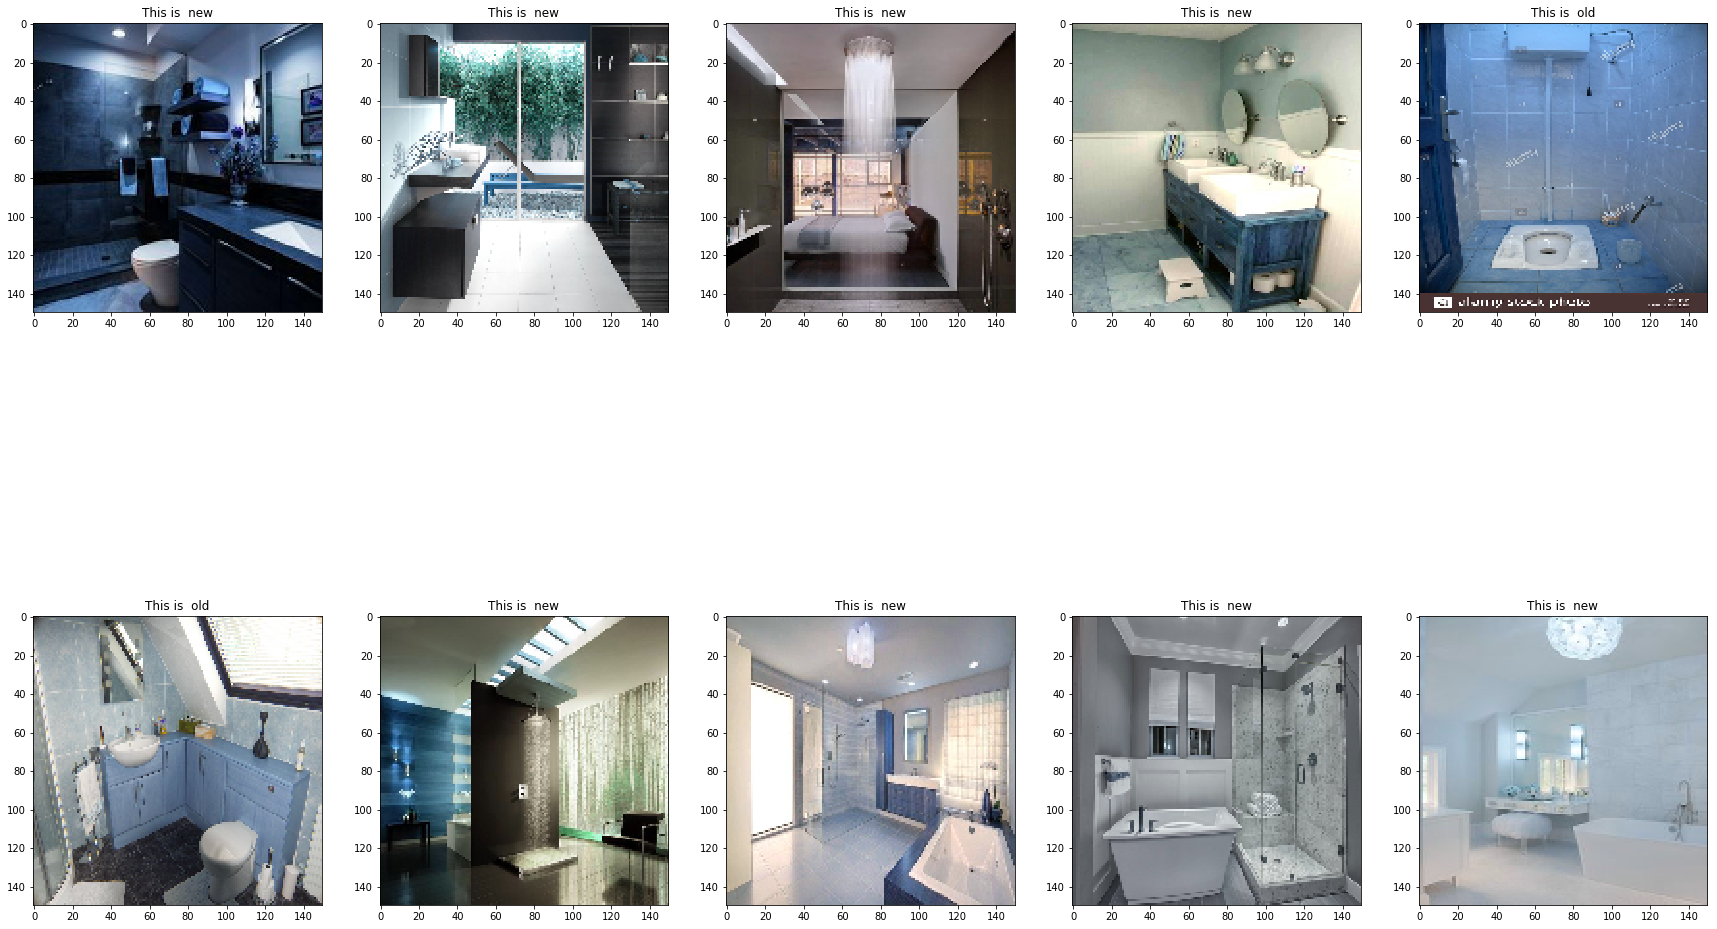

In [47]:
i = 0
text_labels = []
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x,batch_size=1):
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('new')
    else:
        text_labels.append('old')
    plt.subplot(5 / columns +1, columns, i+1)
    plt.title('This is  ' + text_labels[i])
    imgplot = plt.imshow(batch[0])
    i +=1
    if i%10 == 0: 
        break
plt.show()

In [48]:
#Now lets predict on the first 10 Images of the test set 
X_test, y_test = read_and_process_images(test_imgs[20:30])
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale = 1./255)

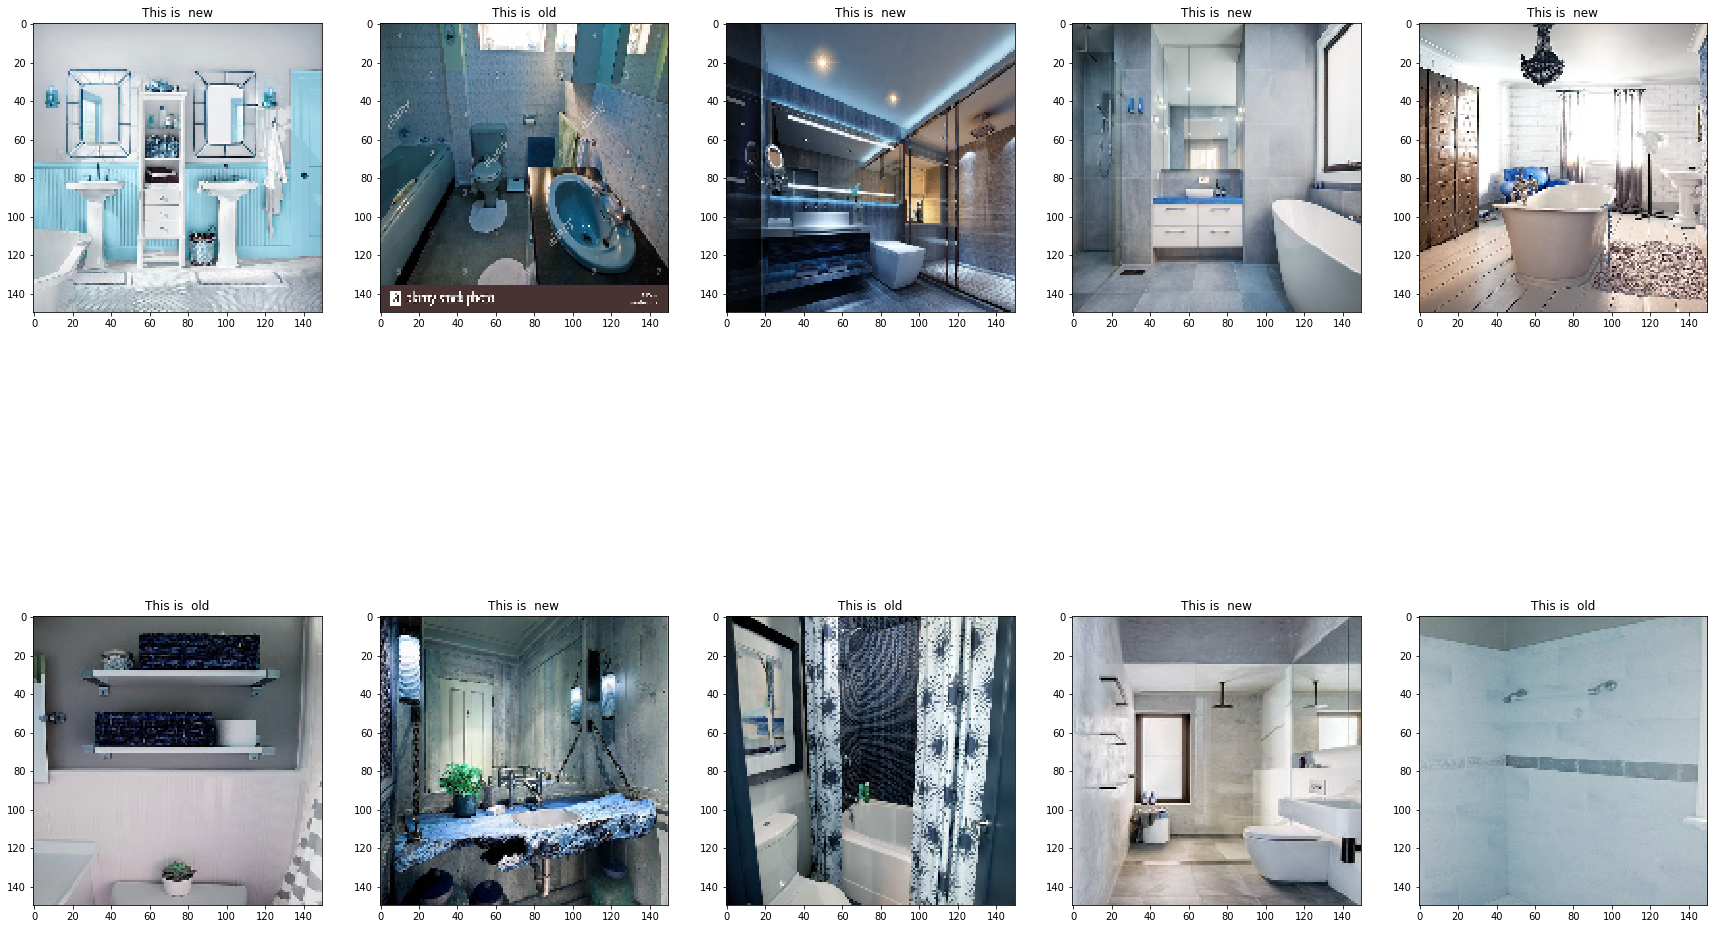

In [49]:
i = 0
text_labels = []
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x,batch_size=1):
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('new')
    else:
        text_labels.append('old')
    plt.subplot(5 / columns +1, columns, i+1)
    plt.title('This is  ' + text_labels[i])
    imgplot = plt.imshow(batch[0])
    i +=1
    if i%10 == 0: 
        break
plt.show()